<a href="https://colab.research.google.com/github/kapoor1309/Projects/blob/main/OpenProjectFinClub.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Installing And Importing Libraries**

In [ ]:
!pip install vadersentiment

In [ ]:
import pandas as pd
import numpy as np
from textblob import TextBlob
import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import top_k_accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

**Importing The Collected Dataset
1. Apple-Headlines and Corresponding Stock Movement(1,0)
2. Tesla-Headlines and Corresponding Stock Movement(1,0)**

In [ ]:
merged_apple=pd.read_csv('/content/apple_dataset.csv')

In [ ]:


merged_tesla=pd.read_csv('/content/tesla_dataset.csv')

**Importing The Collected Dataset (Containing The News Headlines Of Two Companies Tesla and Apple)**

In [ ]:
merged_apple

,title,Date,label
0,BlackBerry sues Ryan Seacrest's company over i...,2014-01-03,0.0
1,"Apple reports $1 billion app sales in Dec, $10...",2014-01-07,0.0
2,Apple seeks removal of court-appointed antitru...,2014-01-08,1.0
3,"Apple, Samsung CEOs agree to mediation in U.S....",2014-01-09,0.0
4,"Apple did not violate Google patent, says U.S....",2014-01-10,0.0
...,...,...,...
2118,Analysts Predict Apple's Trillion-Dollar Marke...,2023-12-22,0.0
2119,Chip Champions: 3 Semiconductor Stocks to Buy ...,2023-12-26,0.0
2120,The 7 Highest-Yielding Dividend Gems in Warren...,2023-12-27,1.0
2121,Top Performers: 7 High-Efficiency Stocks With ...,2023-12-28,0.0


In [ ]:
merged_tesla

,Date,label,title
0,2014-04-22,1.0,Tesla expects big investment on charging stati...
1,2014-04-25,0.0,Tesla Motors says CEO Musk took $1 in salary l...
2,2014-05-07,0.0,"Tesla posts strong operating profit, says batt..."
3,2014-05-08,0.0,"Tesla outlook disappoints some on Wall St, sha..."
4,2014-06-12,0.0,Tesla Motors to share patents to spur electric...
...,...,...,...
1814,2023-12-22,0.0,Tesla Gets Price Target Boost To $350 As Wedbu...
1815,2023-12-26,1.0,Plug Into Profits: 3 EV Charging Stocks to Buy...
1816,2023-12-27,1.0,Tesla Set To Surpass Q4 Delivery Target? Top A...
1817,2023-12-28,0.0,AI Predictions: 3 Penny Stocks That Google Gem...


**Importing Historical Data**

In [ ]:
import yfinance as yf
ticker_symbol = 'AAPL'
apple_data = yf.download(ticker_symbol, start='2014-01-01', end='2024-01-01')
print(apple_data.head())


[*********************100%%**********************]  1 of 1 completed

                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2014-01-02  19.845715  19.893929  19.715000  19.754642  17.296656  234684800
2014-01-03  19.745001  19.775000  19.301071  19.320715  16.916723  392467600
2014-01-06  19.194643  19.528570  19.057142  19.426071  17.008966  412610800
2014-01-07  19.440001  19.498571  19.211430  19.287144  16.887327  317209200
2014-01-08  19.243214  19.484285  19.238930  19.409286  16.994278  258529600


In [ ]:
import yfinance as yf
ticker_symbol = 'TSLA'
tesla_data = yf.download(ticker_symbol, start='2014-01-01', end='2024-01-01')
print(tesla_data.head())


[*********************100%%**********************]  1 of 1 completed

                 Open       High       Low      Close  Adj Close    Volume
Date                                                                      
2014-01-02   9.986667  10.165333  9.770000  10.006667  10.006667  92826000
2014-01-03  10.000000  10.146000  9.906667   9.970667   9.970667  70425000
2014-01-06  10.000000  10.026667  9.682667   9.800000   9.800000  80416500
2014-01-07   9.841333  10.026667  9.683333   9.957333   9.957333  75511500
2014-01-08   9.923333  10.246667  9.917333  10.085333  10.085333  92448000


**Splitting The Datasets In Two Parts train and test Wrt The Dates**

In [ ]:
train_apple=merged_apple[merged_apple['Date']<'2020-01-01']
test_apple=merged_apple[merged_apple['Date']>='2020-01-01']

In [ ]:
train_apple

,title,Date,label
0,BlackBerry sues Ryan Seacrest's company over i...,2014-01-03,0.0
1,"Apple reports $1 billion app sales in Dec, $10...",2014-01-07,0.0
2,Apple seeks removal of court-appointed antitru...,2014-01-08,1.0
3,"Apple, Samsung CEOs agree to mediation in U.S....",2014-01-09,0.0
4,"Apple did not violate Google patent, says U.S....",2014-01-10,0.0
...,...,...,...
1117,This analyst thinks that Apple's amazing year ...,2019-12-24,0.0
1118,Starbucks Stock Looks Set to Brew More Upside ...,2019-12-26,1.0
1119,One Critical Metric to Watch for Etsy Stock in...,2019-12-27,0.0
1120,Shopify Stock Readies to Leave Bears Behind as...,2019-12-30,1.0


In [ ]:
test_apple

,title,Date,label
1122,Trade of the Day: AAPL Stock a Big Risk to the...,2020-01-02,1.0
1123,Apple's former music boss just perfectly laid ...,2020-01-03,1.0
1124,"Qualcomm Is a Great Company, but QCOM Stock Is...",2020-01-06,1.0
1125,Here’s Why 2020 Won’t End Like 1999’s Partying...,2020-01-07,0.0
1126,Samsung uses strikingly similar images to Appl...,2020-01-08,1.0
...,...,...,...
2118,Analysts Predict Apple's Trillion-Dollar Marke...,2023-12-22,0.0
2119,Chip Champions: 3 Semiconductor Stocks to Buy ...,2023-12-26,0.0
2120,The 7 Highest-Yielding Dividend Gems in Warren...,2023-12-27,1.0
2121,Top Performers: 7 High-Efficiency Stocks With ...,2023-12-28,0.0


In [ ]:
train_tesla=merged_tesla[merged_tesla['Date']<'2020-01-01']
test_tesla=merged_tesla[merged_tesla['Date']>='2020-01-01']

In [ ]:
train_tesla

,Date,label,title
0,2014-04-22,1.0,Tesla expects big investment on charging stati...
1,2014-04-25,0.0,Tesla Motors says CEO Musk took $1 in salary l...
2,2014-05-07,0.0,"Tesla posts strong operating profit, says batt..."
3,2014-05-08,0.0,"Tesla outlook disappoints some on Wall St, sha..."
4,2014-06-12,0.0,Tesla Motors to share patents to spur electric...
...,...,...,...
821,2019-12-24,1.0,Electric Vehicle Start-up Rivian Gets Addition...
822,2019-12-26,1.0,Starbucks Stock Looks Set to Brew More Upside ...
823,2019-12-27,0.0,Elon Musk revealed his favorite film of 2019 w...
824,2019-12-30,0.0,UPDATE 3-Tesla delivers first China-made Model...


In [ ]:
test_tesla

,Date,label,title
826,2020-01-02,1.0,Tesla says will deliver second batch of China-...
827,2020-01-03,1.0,Tesla cuts starting price for China-made Model...
828,2020-01-06,1.0,"Bitcoin, ‘Safe Haven’ Investments Spike on Ira..."
829,2020-01-07,1.0,Tesla starts work on Model Y programme at Shan...
830,2020-01-08,1.0,Tech and gaming workers seeking to organize ge...
...,...,...,...
1814,2023-12-22,0.0,Tesla Gets Price Target Boost To $350 As Wedbu...
1815,2023-12-26,1.0,Plug Into Profits: 3 EV Charging Stocks to Buy...
1816,2023-12-27,1.0,Tesla Set To Surpass Q4 Delivery Target? Top A...
1817,2023-12-28,0.0,AI Predictions: 3 Penny Stocks That Google Gem...


**Merging The Datasets With Their Corresponding Historical Data**

In [ ]:
tesla_data.reset_index(inplace=True)
tesla_data['Date'] = pd.to_datetime(tesla_data['Date'])
tesla_data['Date'] = tesla_data['Date'].dt.strftime('%Y-%m-%d')
train_tesla = pd.merge(train_tesla, tesla_data, left_on='Date', right_on='Date')



In [ ]:

tesla_data['Date'] = pd.to_datetime(tesla_data['Date'])
tesla_data['Date'] = tesla_data['Date'].dt.strftime('%Y-%m-%d')
test_tesla = pd.merge(test_tesla, tesla_data, left_on='Date', right_on='Date')


In [ ]:
train_tesla

,Date,label,title,Open,High,Low,Close,Adj Close,Volume
0,2014-04-22,1.0,Tesla expects big investment on charging stati...,13.757333,14.622000,13.667333,14.576000,14.576000,147070500
1,2014-04-25,0.0,Tesla Motors says CEO Musk took $1 in salary l...,13.466667,13.780000,13.176667,13.323333,13.323333,104950500
2,2014-05-07,0.0,"Tesla posts strong operating profit, says batt...",13.976000,14.013333,13.150000,13.423333,13.423333,152689500
3,2014-05-08,0.0,"Tesla outlook disappoints some on Wall St, sha...",12.133333,12.960000,11.866667,11.906000,11.906000,300849000
4,2014-06-12,0.0,Tesla Motors to share patents to spur electric...,13.673333,13.992000,13.514000,13.568000,13.568000,89905500
...,...,...,...,...,...,...,...,...,...
821,2019-12-24,1.0,Electric Vehicle Start-up Rivian Gets Addition...,27.890667,28.364668,27.512667,28.350000,28.350000,120820500
822,2019-12-26,1.0,Starbucks Stock Looks Set to Brew More Upside ...,28.527332,28.898666,28.423332,28.729334,28.729334,159508500
823,2019-12-27,0.0,Elon Musk revealed his favorite film of 2019 w...,29.000000,29.020666,28.407333,28.691999,28.691999,149185500
824,2019-12-30,0.0,UPDATE 3-Tesla delivers first China-made Model...,28.586000,28.600000,27.284000,27.646667,27.646667,188796000


In [ ]:
test_tesla

,Date,label,title,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,1.0,Tesla says will deliver second batch of China-...,28.299999,28.713333,28.114000,28.684000,28.684000,142981500
1,2020-01-03,1.0,Tesla cuts starting price for China-made Model...,29.366667,30.266666,29.128000,29.534000,29.534000,266677500
2,2020-01-06,1.0,"Bitcoin, ‘Safe Haven’ Investments Spike on Ira...",29.364668,30.104000,29.333332,30.102667,30.102667,151995000
3,2020-01-07,1.0,Tesla starts work on Model Y programme at Shan...,30.760000,31.441999,30.224001,31.270666,31.270666,268231500
4,2020-01-08,1.0,Tech and gaming workers seeking to organize ge...,31.580000,33.232666,31.215334,32.809334,32.809334,467164500
...,...,...,...,...,...,...,...,...,...
988,2023-12-22,0.0,Tesla Gets Price Target Boost To $350 As Wedbu...,256.760010,258.220001,251.369995,252.539993,252.539993,93249800
989,2023-12-26,1.0,Plug Into Profits: 3 EV Charging Stocks to Buy...,254.490005,257.970001,252.910004,256.609985,256.609985,86892400
990,2023-12-27,1.0,Tesla Set To Surpass Q4 Delivery Target? Top A...,258.350006,263.339996,257.519989,261.440002,261.440002,106494400
991,2023-12-28,0.0,AI Predictions: 3 Penny Stocks That Google Gem...,263.660004,265.130005,252.710007,253.179993,253.179993,113619900


In [ ]:
apple_data.reset_index(inplace=True)
apple_data['Date'] = pd.to_datetime(apple_data['Date'])
apple_data['Date'] = apple_data['Date'].dt.strftime('%Y-%m-%d')
train_apple = pd.merge(train_apple, apple_data, left_on='Date', right_on='Date')

In [ ]:
apple_data['Date'] = pd.to_datetime(apple_data['Date'])
apple_data['Date'] = apple_data['Date'].dt.strftime('%Y-%m-%d')
test_apple = pd.merge(test_apple, apple_data, left_on='Date', right_on='Date')

In [ ]:
train_apple

,title,Date,label,Open,High,Low,Close,Adj Close,Volume
0,BlackBerry sues Ryan Seacrest's company over i...,2014-01-03,0.0,19.745001,19.775000,19.301071,19.320715,16.916723,392467600
1,"Apple reports $1 billion app sales in Dec, $10...",2014-01-07,0.0,19.440001,19.498571,19.211430,19.287144,16.887327,317209200
2,Apple seeks removal of court-appointed antitru...,2014-01-08,1.0,19.243214,19.484285,19.238930,19.409286,16.994278,258529600
3,"Apple, Samsung CEOs agree to mediation in U.S....",2014-01-09,0.0,19.528570,19.530714,19.119642,19.161428,16.777256,279148800
4,"Apple did not violate Google patent, says U.S....",2014-01-10,0.0,19.279642,19.314285,18.968214,19.033571,16.665310,304976000
...,...,...,...,...,...,...,...,...,...
1117,This analyst thinks that Apple's amazing year ...,2019-12-24,0.0,71.172501,71.222504,70.730003,71.067497,69.147995,48478800
1118,Starbucks Stock Looks Set to Brew More Upside ...,2019-12-26,1.0,71.205002,72.495003,71.175003,72.477501,70.519920,93121200
1119,One Critical Metric to Watch for Etsy Stock in...,2019-12-27,0.0,72.779999,73.492500,72.029999,72.449997,70.493164,146266000
1120,Shopify Stock Readies to Leave Bears Behind as...,2019-12-30,1.0,72.364998,73.172501,71.305000,72.879997,70.911537,144114400


In [ ]:
test_apple


,title,Date,label,Open,High,Low,Close,Adj Close,Volume
0,Trade of the Day: AAPL Stock a Big Risk to the...,2020-01-02,1.0,74.059998,75.150002,73.797501,75.087502,73.059418,135480400
1,Apple's former music boss just perfectly laid ...,2020-01-03,1.0,74.287498,75.144997,74.125000,74.357498,72.349129,146322800
2,"Qualcomm Is a Great Company, but QCOM Stock Is...",2020-01-06,1.0,73.447502,74.989998,73.187500,74.949997,72.925621,118387200
3,Here’s Why 2020 Won’t End Like 1999’s Partying...,2020-01-07,0.0,74.959999,75.224998,74.370003,74.597504,72.582649,108872000
4,Samsung uses strikingly similar images to Appl...,2020-01-08,1.0,74.290001,76.110001,74.290001,75.797501,73.750259,132079200
...,...,...,...,...,...,...,...,...,...
996,Analysts Predict Apple's Trillion-Dollar Marke...,2023-12-22,0.0,195.179993,195.410004,192.970001,193.600006,193.353287,37122800
997,Chip Champions: 3 Semiconductor Stocks to Buy ...,2023-12-26,0.0,193.610001,193.889999,192.830002,193.050003,192.803986,28919300
998,The 7 Highest-Yielding Dividend Gems in Warren...,2023-12-27,1.0,192.490005,193.500000,191.089996,193.149994,192.903839,48087700
999,Top Performers: 7 High-Efficiency Stocks With ...,2023-12-28,0.0,194.139999,194.660004,193.169998,193.580002,193.333298,34049900


**Text Preprocessing**

Here i have added another column named section because the text preprocessing will be done for all the datasets together so in order to get these datasets individually after preprocessing

In [ ]:
train_tesla['section'] = 'train_tesla'
train_apple['section'] = 'train_apple'
test_tesla['section'] = 'test_tesla'
test_apple['section'] = 'test_apple'
merged_result = pd.concat([train_tesla, train_apple, test_tesla, test_apple], ignore_index=True)


In [ ]:
merged_result

,Date,label,title,Open,High,Low,Close,Adj Close,Volume,section
0,2014-04-22,1.0,Tesla expects big investment on charging stati...,13.757333,14.622000,13.667333,14.576000,14.576000,147070500,train_tesla
1,2014-04-25,0.0,Tesla Motors says CEO Musk took $1 in salary l...,13.466667,13.780000,13.176667,13.323333,13.323333,104950500,train_tesla
2,2014-05-07,0.0,"Tesla posts strong operating profit, says batt...",13.976000,14.013333,13.150000,13.423333,13.423333,152689500,train_tesla
3,2014-05-08,0.0,"Tesla outlook disappoints some on Wall St, sha...",12.133333,12.960000,11.866667,11.906000,11.906000,300849000,train_tesla
4,2014-06-12,0.0,Tesla Motors to share patents to spur electric...,13.673333,13.992000,13.514000,13.568000,13.568000,89905500,train_tesla
...,...,...,...,...,...,...,...,...,...,...
3937,2023-12-22,0.0,Analysts Predict Apple's Trillion-Dollar Marke...,195.179993,195.410004,192.970001,193.600006,193.353287,37122800,test_apple
3938,2023-12-26,0.0,Chip Champions: 3 Semiconductor Stocks to Buy ...,193.610001,193.889999,192.830002,193.050003,192.803986,28919300,test_apple
3939,2023-12-27,1.0,The 7 Highest-Yielding Dividend Gems in Warren...,192.490005,193.500000,191.089996,193.149994,192.903839,48087700,test_apple
3940,2023-12-28,0.0,Top Performers: 7 High-Efficiency Stocks With ...,194.139999,194.660004,193.169998,193.580002,193.333298,34049900,test_apple


In [ ]:
merged_result['title']=merged_result['title'].str.lower()

In [ ]:
merged_result['title']

0       tesla expects big investment on charging stati...
1       tesla motors says ceo musk took $1 in salary l...
2       tesla posts strong operating profit, says batt...
3       tesla outlook disappoints some on wall st, sha...
4       tesla motors to share patents to spur electric...
                              ...                        
3937    analysts predict apple's trillion-dollar marke...
3938    chip champions: 3 semiconductor stocks to buy ...
3939    the 7 highest-yielding dividend gems in warren...
3940    top performers: 7 high-efficiency stocks with ...
3941    top 3 large-cap growth stock picks for the new...
Name: title, Length: 3942, dtype: object

In [ ]:
import pandas as pd
import re
import nltk
from nltk.stem import WordNetLemmatizer

In [ ]:
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    return text
merged_result['cleaned_title']=merged_result['title'].apply(preprocess_text)

In [ ]:
merged_result

,Date,label,title,Open,High,Low,Close,Adj Close,Volume,section,cleaned_title
0,2014-04-22,1.0,tesla expects big investment on charging stati...,13.757333,14.622000,13.667333,14.576000,14.576000,147070500,train_tesla,tesla expects big investment on charging stati...
1,2014-04-25,0.0,tesla motors says ceo musk took $1 in salary l...,13.466667,13.780000,13.176667,13.323333,13.323333,104950500,train_tesla,tesla motors says ceo musk took 1 in salary la...
2,2014-05-07,0.0,"tesla posts strong operating profit, says batt...",13.976000,14.013333,13.150000,13.423333,13.423333,152689500,train_tesla,tesla posts strong operating profit says batte...
3,2014-05-08,0.0,"tesla outlook disappoints some on wall st, sha...",12.133333,12.960000,11.866667,11.906000,11.906000,300849000,train_tesla,tesla outlook disappoints some on wall st shar...
4,2014-06-12,0.0,tesla motors to share patents to spur electric...,13.673333,13.992000,13.514000,13.568000,13.568000,89905500,train_tesla,tesla motors to share patents to spur electric...
...,...,...,...,...,...,...,...,...,...,...,...
3937,2023-12-22,0.0,analysts predict apple's trillion-dollar marke...,195.179993,195.410004,192.970001,193.600006,193.353287,37122800,test_apple,analysts predict apples trilliondollar market ...
3938,2023-12-26,0.0,chip champions: 3 semiconductor stocks to buy ...,193.610001,193.889999,192.830002,193.050003,192.803986,28919300,test_apple,chip champions 3 semiconductor stocks to buy b...
3939,2023-12-27,1.0,the 7 highest-yielding dividend gems in warren...,192.490005,193.500000,191.089996,193.149994,192.903839,48087700,test_apple,the 7 highestyielding dividend gems in warren ...
3940,2023-12-28,0.0,top performers: 7 high-efficiency stocks with ...,194.139999,194.660004,193.169998,193.580002,193.333298,34049900,test_apple,top performers 7 highefficiency stocks with st...


**Lemmatization and Stemming**

In [ ]:
lemmatizer = WordNetLemmatizer()
def lemmatize_text(text):
    tokens = text.split()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(lemmatized_tokens)
merged_result['lemmatized_headline'] = merged_result['cleaned_title'].apply(lemmatize_text)
merged_result


,Date,label,title,Open,High,Low,Close,Adj Close,Volume,section,cleaned_title,lemmatized_headline
0,2014-04-22,1.0,tesla expects big investment on charging stati...,13.757333,14.622000,13.667333,14.576000,14.576000,147070500,train_tesla,tesla expects big investment on charging stati...,tesla expects big investment on charging stati...
1,2014-04-25,0.0,tesla motors says ceo musk took $1 in salary l...,13.466667,13.780000,13.176667,13.323333,13.323333,104950500,train_tesla,tesla motors says ceo musk took 1 in salary la...,tesla motor say ceo musk took 1 in salary last...
2,2014-05-07,0.0,"tesla posts strong operating profit, says batt...",13.976000,14.013333,13.150000,13.423333,13.423333,152689500,train_tesla,tesla posts strong operating profit says batte...,tesla post strong operating profit say battery...
3,2014-05-08,0.0,"tesla outlook disappoints some on wall st, sha...",12.133333,12.960000,11.866667,11.906000,11.906000,300849000,train_tesla,tesla outlook disappoints some on wall st shar...,tesla outlook disappoints some on wall st shar...
4,2014-06-12,0.0,tesla motors to share patents to spur electric...,13.673333,13.992000,13.514000,13.568000,13.568000,89905500,train_tesla,tesla motors to share patents to spur electric...,tesla motor to share patent to spur electric c...
...,...,...,...,...,...,...,...,...,...,...,...,...
3937,2023-12-22,0.0,analysts predict apple's trillion-dollar marke...,195.179993,195.410004,192.970001,193.600006,193.353287,37122800,test_apple,analysts predict apples trilliondollar market ...,analyst predict apple trilliondollar market va...
3938,2023-12-26,0.0,chip champions: 3 semiconductor stocks to buy ...,193.610001,193.889999,192.830002,193.050003,192.803986,28919300,test_apple,chip champions 3 semiconductor stocks to buy b...,chip champion 3 semiconductor stock to buy bef...
3939,2023-12-27,1.0,the 7 highest-yielding dividend gems in warren...,192.490005,193.500000,191.089996,193.149994,192.903839,48087700,test_apple,the 7 highestyielding dividend gems in warren ...,the 7 highestyielding dividend gem in warren b...
3940,2023-12-28,0.0,top performers: 7 high-efficiency stocks with ...,194.139999,194.660004,193.169998,193.580002,193.333298,34049900,test_apple,top performers 7 highefficiency stocks with st...,top performer 7 highefficiency stock with stel...


In [ ]:
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

In [ ]:
merged_result['Subjectivity']=merged_result['lemmatized_headline'].apply(getSubjectivity)
merged_result['Polarity']=merged_result['lemmatized_headline'].apply(getPolarity)

In [ ]:
merged_result


,Date,label,title,Open,High,Low,Close,Adj Close,Volume,section,cleaned_title,lemmatized_headline,Subjectivity,Polarity
0,2014-04-22,1.0,tesla expects big investment on charging stati...,13.757333,14.622000,13.667333,14.576000,14.576000,147070500,train_tesla,tesla expects big investment on charging stati...,tesla expects big investment on charging stati...,0.100000,0.000000
1,2014-04-25,0.0,tesla motors says ceo musk took $1 in salary l...,13.466667,13.780000,13.176667,13.323333,13.323333,104950500,train_tesla,tesla motors says ceo musk took 1 in salary la...,tesla motor say ceo musk took 1 in salary last...,0.066667,0.000000
2,2014-05-07,0.0,"tesla posts strong operating profit, says batt...",13.976000,14.013333,13.150000,13.423333,13.423333,152689500,train_tesla,tesla posts strong operating profit says batte...,tesla post strong operating profit say battery...,0.733333,0.433333
3,2014-05-08,0.0,"tesla outlook disappoints some on wall st, sha...",12.133333,12.960000,11.866667,11.906000,11.906000,300849000,train_tesla,tesla outlook disappoints some on wall st shar...,tesla outlook disappoints some on wall st shar...,0.400000,0.100000
4,2014-06-12,0.0,tesla motors to share patents to spur electric...,13.673333,13.992000,13.514000,13.568000,13.568000,89905500,train_tesla,tesla motors to share patents to spur electric...,tesla motor to share patent to spur electric c...,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3937,2023-12-22,0.0,analysts predict apple's trillion-dollar marke...,195.179993,195.410004,192.970001,193.600006,193.353287,37122800,test_apple,analysts predict apples trilliondollar market ...,analyst predict apple trilliondollar market va...,0.250000,0.250000
3938,2023-12-26,0.0,chip champions: 3 semiconductor stocks to buy ...,193.610001,193.889999,192.830002,193.050003,192.803986,28919300,test_apple,chip champions 3 semiconductor stocks to buy b...,chip champion 3 semiconductor stock to buy bef...,0.511364,0.226623
3939,2023-12-27,1.0,the 7 highest-yielding dividend gems in warren...,192.490005,193.500000,191.089996,193.149994,192.903839,48087700,test_apple,the 7 highestyielding dividend gems in warren ...,the 7 highestyielding dividend gem in warren b...,0.698485,0.392424
3940,2023-12-28,0.0,top performers: 7 high-efficiency stocks with ...,194.139999,194.660004,193.169998,193.580002,193.333298,34049900,test_apple,top performers 7 highefficiency stocks with st...,top performer 7 highefficiency stock with stel...,0.349107,0.189286


In [ ]:
def getSIA(text):
  sia=SentimentIntensityAnalyzer()
  sentiment=sia.polarity_scores(text)
  return sentiment

In [ ]:
compound=[]
neg=[]
pos=[]
neu=[]
SIA=0
for i in range(0,len(merged_result['lemmatized_headline'])):
  SIA=getSIA(merged_result['lemmatized_headline'][i])
  compound.append(SIA['compound'])
  neg.append(SIA['neg'])
  neu.append(SIA['neu'])
  pos.append(SIA['pos'])

In [ ]:
merged_result['Compund']=compound
merged_result['Negative']=neg
merged_result['Neutral']=neu
merged_result['Positive']=pos

In [ ]:
merged_result

,Date,label,title,Open,High,Low,Close,Adj Close,Volume,section,cleaned_title,lemmatized_headline,Subjectivity,Polarity,Compund,Negative,Neutral,Positive
0,2014-04-22,1.0,tesla expects big investment on charging stati...,13.757333,14.622000,13.667333,14.576000,14.576000,147070500,train_tesla,tesla expects big investment on charging stati...,tesla expects big investment on charging stati...,0.100000,0.000000,0.0000,0.000,1.000,0.000
1,2014-04-25,0.0,tesla motors says ceo musk took $1 in salary l...,13.466667,13.780000,13.176667,13.323333,13.323333,104950500,train_tesla,tesla motors says ceo musk took 1 in salary la...,tesla motor say ceo musk took 1 in salary last...,0.066667,0.000000,0.0000,0.000,1.000,0.000
2,2014-05-07,0.0,"tesla posts strong operating profit, says batt...",13.976000,14.013333,13.150000,13.423333,13.423333,152689500,train_tesla,tesla posts strong operating profit says batte...,tesla post strong operating profit say battery...,0.733333,0.433333,0.7351,0.000,0.592,0.408
3,2014-05-08,0.0,"tesla outlook disappoints some on wall st, sha...",12.133333,12.960000,11.866667,11.906000,11.906000,300849000,train_tesla,tesla outlook disappoints some on wall st shar...,tesla outlook disappoints some on wall st shar...,0.400000,0.100000,-0.2960,0.187,0.675,0.139
4,2014-06-12,0.0,tesla motors to share patents to spur electric...,13.673333,13.992000,13.514000,13.568000,13.568000,89905500,train_tesla,tesla motors to share patents to spur electric...,tesla motor to share patent to spur electric c...,0.000000,0.000000,0.2960,0.000,0.804,0.196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3937,2023-12-22,0.0,analysts predict apple's trillion-dollar marke...,195.179993,195.410004,192.970001,193.600006,193.353287,37122800,test_apple,analysts predict apples trilliondollar market ...,analyst predict apple trilliondollar market va...,0.250000,0.250000,0.7269,0.000,0.825,0.175
3938,2023-12-26,0.0,chip champions: 3 semiconductor stocks to buy ...,193.610001,193.889999,192.830002,193.050003,192.803986,28919300,test_apple,chip champions 3 semiconductor stocks to buy b...,chip champion 3 semiconductor stock to buy bef...,0.511364,0.226623,0.8126,0.064,0.789,0.146
3939,2023-12-27,1.0,the 7 highest-yielding dividend gems in warren...,192.490005,193.500000,191.089996,193.149994,192.903839,48087700,test_apple,the 7 highestyielding dividend gems in warren ...,the 7 highestyielding dividend gem in warren b...,0.698485,0.392424,0.8576,0.056,0.759,0.185
3940,2023-12-28,0.0,top performers: 7 high-efficiency stocks with ...,194.139999,194.660004,193.169998,193.580002,193.333298,34049900,test_apple,top performers 7 highefficiency stocks with st...,top performer 7 highefficiency stock with stel...,0.349107,0.189286,0.9393,0.016,0.822,0.163


In [ ]:
merged_result.drop(['title','cleaned_title','lemmatized_headline'],axis=1,inplace=True)

In [ ]:
merged_result

,Date,label,Open,High,Low,Close,Adj Close,Volume,section,Subjectivity,Polarity,Compund,Negative,Neutral,Positive
0,2014-04-22,1.0,13.757333,14.622000,13.667333,14.576000,14.576000,147070500,train_tesla,0.100000,0.000000,0.0000,0.000,1.000,0.000
1,2014-04-25,0.0,13.466667,13.780000,13.176667,13.323333,13.323333,104950500,train_tesla,0.066667,0.000000,0.0000,0.000,1.000,0.000
2,2014-05-07,0.0,13.976000,14.013333,13.150000,13.423333,13.423333,152689500,train_tesla,0.733333,0.433333,0.7351,0.000,0.592,0.408
3,2014-05-08,0.0,12.133333,12.960000,11.866667,11.906000,11.906000,300849000,train_tesla,0.400000,0.100000,-0.2960,0.187,0.675,0.139
4,2014-06-12,0.0,13.673333,13.992000,13.514000,13.568000,13.568000,89905500,train_tesla,0.000000,0.000000,0.2960,0.000,0.804,0.196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3937,2023-12-22,0.0,195.179993,195.410004,192.970001,193.600006,193.353287,37122800,test_apple,0.250000,0.250000,0.7269,0.000,0.825,0.175
3938,2023-12-26,0.0,193.610001,193.889999,192.830002,193.050003,192.803986,28919300,test_apple,0.511364,0.226623,0.8126,0.064,0.789,0.146
3939,2023-12-27,1.0,192.490005,193.500000,191.089996,193.149994,192.903839,48087700,test_apple,0.698485,0.392424,0.8576,0.056,0.759,0.185
3940,2023-12-28,0.0,194.139999,194.660004,193.169998,193.580002,193.333298,34049900,test_apple,0.349107,0.189286,0.9393,0.016,0.822,0.163


**After Preprocessing Again Separating All the datasets**

In [ ]:
test_tesla = merged_result[merged_result['section'] == 'test_tesla'].drop(columns=['section']).reset_index(drop=True)
test_apple = merged_result[merged_result['section'] == 'test_apple'].drop(columns=['section']).reset_index(drop=True)


In [ ]:
test_tesla


,Date,label,Open,High,Low,Close,Adj Close,Volume,Subjectivity,Polarity,Compund,Negative,Neutral,Positive
0,2020-01-02,1.0,28.299999,28.713333,28.114000,28.684000,28.684000,142981500,0.226171,0.194215,-0.7650,0.069,0.899,0.032
1,2020-01-03,1.0,29.366667,30.266666,29.128000,29.534000,29.534000,266677500,0.391004,0.089319,-0.9473,0.140,0.797,0.063
2,2020-01-06,1.0,29.364668,30.104000,29.333332,30.102667,30.102667,151995000,0.500000,0.500000,0.4404,0.000,0.828,0.172
3,2020-01-07,1.0,30.760000,31.441999,30.224001,31.270666,31.270666,268231500,0.452500,0.105833,-0.8166,0.040,0.950,0.010
4,2020-01-08,1.0,31.580000,33.232666,31.215334,32.809334,32.809334,467164500,0.300000,0.383333,0.8658,0.025,0.843,0.132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
988,2023-12-22,0.0,256.760010,258.220001,251.369995,252.539993,252.539993,93249800,0.450000,0.466667,0.9100,0.052,0.790,0.159
989,2023-12-26,1.0,254.490005,257.970001,252.910004,256.609985,256.609985,86892400,0.258000,0.082000,0.6808,0.017,0.914,0.069
990,2023-12-27,1.0,258.350006,263.339996,257.519989,261.440002,261.440002,106494400,0.547917,0.380871,0.9520,0.000,0.741,0.259
991,2023-12-28,0.0,263.660004,265.130005,252.710007,253.179993,253.179993,113619900,0.304167,0.206250,0.8834,0.073,0.768,0.159


In [ ]:
merged_result = merged_result[~merged_result['section'].isin(['test_tesla', 'test_apple'])].reset_index(drop=True)


In [ ]:
merged_result.drop(['section'],axis=1,inplace=True)

In [ ]:
merged_result

,Date,label,Open,High,Low,Close,Adj Close,Volume,Subjectivity,Polarity,Compund,Negative,Neutral,Positive
0,2014-04-22,1.0,13.757333,14.622000,13.667333,14.576000,14.576000,147070500,0.100000,0.000000,0.0000,0.000,1.000,0.000
1,2014-04-25,0.0,13.466667,13.780000,13.176667,13.323333,13.323333,104950500,0.066667,0.000000,0.0000,0.000,1.000,0.000
2,2014-05-07,0.0,13.976000,14.013333,13.150000,13.423333,13.423333,152689500,0.733333,0.433333,0.7351,0.000,0.592,0.408
3,2014-05-08,0.0,12.133333,12.960000,11.866667,11.906000,11.906000,300849000,0.400000,0.100000,-0.2960,0.187,0.675,0.139
4,2014-06-12,0.0,13.673333,13.992000,13.514000,13.568000,13.568000,89905500,0.000000,0.000000,0.2960,0.000,0.804,0.196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1943,2019-12-24,0.0,71.172501,71.222504,70.730003,71.067497,69.147995,48478800,0.900000,0.400000,0.9618,0.000,0.772,0.228
1944,2019-12-26,1.0,71.205002,72.495003,71.175003,72.477501,70.519920,93121200,0.387500,0.218750,0.9186,0.032,0.804,0.163
1945,2019-12-27,0.0,72.779999,73.492500,72.029999,72.449997,70.493164,146266000,0.369643,0.115714,0.9371,0.018,0.824,0.158
1946,2019-12-30,1.0,72.364998,73.172501,71.305000,72.879997,70.911537,144114400,0.541888,0.207413,0.2789,0.073,0.843,0.084


**Training And Testing**

In [ ]:
X_train=merged_result.drop(['Date','label'],axis=1)
y_train=merged_result['label']

In [ ]:
model=LinearDiscriminantAnalysis().fit(X_train,y_train)

In [ ]:
test_tesla

,Date,label,Open,High,Low,Close,Adj Close,Volume,Subjectivity,Polarity,Compund,Negative,Neutral,Positive
0,2020-01-02,1.0,28.299999,28.713333,28.114000,28.684000,28.684000,142981500,0.226171,0.194215,-0.7650,0.069,0.899,0.032
1,2020-01-03,1.0,29.366667,30.266666,29.128000,29.534000,29.534000,266677500,0.391004,0.089319,-0.9473,0.140,0.797,0.063
2,2020-01-06,1.0,29.364668,30.104000,29.333332,30.102667,30.102667,151995000,0.500000,0.500000,0.4404,0.000,0.828,0.172
3,2020-01-07,1.0,30.760000,31.441999,30.224001,31.270666,31.270666,268231500,0.452500,0.105833,-0.8166,0.040,0.950,0.010
4,2020-01-08,1.0,31.580000,33.232666,31.215334,32.809334,32.809334,467164500,0.300000,0.383333,0.8658,0.025,0.843,0.132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
988,2023-12-22,0.0,256.760010,258.220001,251.369995,252.539993,252.539993,93249800,0.450000,0.466667,0.9100,0.052,0.790,0.159
989,2023-12-26,1.0,254.490005,257.970001,252.910004,256.609985,256.609985,86892400,0.258000,0.082000,0.6808,0.017,0.914,0.069
990,2023-12-27,1.0,258.350006,263.339996,257.519989,261.440002,261.440002,106494400,0.547917,0.380871,0.9520,0.000,0.741,0.259
991,2023-12-28,0.0,263.660004,265.130005,252.710007,253.179993,253.179993,113619900,0.304167,0.206250,0.8834,0.073,0.768,0.159


In [ ]:
y_test_tesla=test_tesla[['Date','label']]

In [ ]:
y_test_tesla

,Date,label
0,2020-01-02,1.0
1,2020-01-03,1.0
2,2020-01-06,1.0
3,2020-01-07,1.0
4,2020-01-08,1.0
...,...,...
988,2023-12-22,0.0
989,2023-12-26,1.0
990,2023-12-27,1.0
991,2023-12-28,0.0


In [ ]:
X_test_tesla=test_tesla.drop(['Date','label'],axis=1)

In [ ]:
y_pred_tesla=model.predict(X_test_tesla)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_pred_tesla,y_test_tesla['label'])

0.9707955689828801

In [ ]:
test_apple

,Date,label,Open,High,Low,Close,Adj Close,Volume,Subjectivity,Polarity,Compund,Negative,Neutral,Positive
0,2020-01-02,1.0,74.059998,75.150002,73.797501,75.087502,73.059418,135480400,0.373201,0.170502,0.9402,0.056,0.790,0.154
1,2020-01-03,1.0,74.287498,75.144997,74.125000,74.357498,72.349129,146322800,0.432699,0.152756,0.1406,0.046,0.881,0.073
2,2020-01-06,1.0,73.447502,74.989998,73.187500,74.949997,72.925621,118387200,0.612121,0.163636,-0.3818,0.095,0.828,0.076
3,2020-01-07,0.0,74.959999,75.224998,74.370003,74.597504,72.582649,108872000,0.475000,0.350000,0.6544,0.040,0.876,0.084
4,2020-01-08,1.0,74.290001,76.110001,74.290001,75.797501,73.750259,132079200,0.441515,0.322121,0.2467,0.106,0.774,0.120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,2023-12-22,0.0,195.179993,195.410004,192.970001,193.600006,193.353287,37122800,0.250000,0.250000,0.7269,0.000,0.825,0.175
997,2023-12-26,0.0,193.610001,193.889999,192.830002,193.050003,192.803986,28919300,0.511364,0.226623,0.8126,0.064,0.789,0.146
998,2023-12-27,1.0,192.490005,193.500000,191.089996,193.149994,192.903839,48087700,0.698485,0.392424,0.8576,0.056,0.759,0.185
999,2023-12-28,0.0,194.139999,194.660004,193.169998,193.580002,193.333298,34049900,0.349107,0.189286,0.9393,0.016,0.822,0.163


In [ ]:
y_test_apple=test_apple[['Date','label']]

In [ ]:
X_test_apple=test_apple.drop(['Date','label'],axis=1)

In [ ]:
y_pred_apple=model.predict(X_test_apple)

In [ ]:
accuracy_score(y_pred_apple,y_test_apple['label'])

0.97002997002997

**Calculating All The Metrices For Calculating The Accuracy Of The Model**

Accuracy: 0.97
Precision: 1.00
Recall: 0.95
F1-score: 0.97
ROC AUC score: 0.97


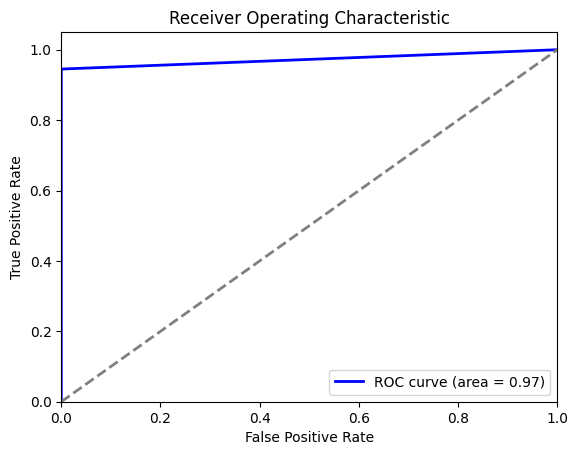

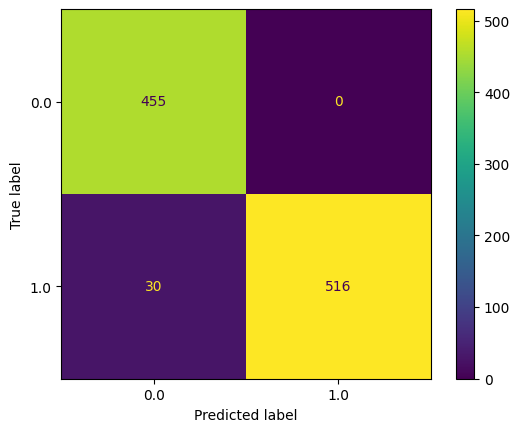

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Calculate accuracy
accuracy = accuracy_score(y_test_apple['label'], y_pred_apple)
print(f'Accuracy: {accuracy:.2f}')

# Calculate precision
precision = precision_score(y_test_apple['label'], y_pred_apple)
print(f'Precision: {precision:.2f}')

# Calculate recall
recall = recall_score(y_test_apple['label'], y_pred_apple)
print(f'Recall: {recall:.2f}')

# Calculate F1-score
f1 = f1_score(y_test_apple['label'], y_pred_apple)
print(f'F1-score: {f1:.2f}')

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test_apple['label'], y_pred_apple)
print(f'ROC AUC score: {roc_auc:.2f}')

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test_apple['label'], y_pred_apple)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Plot confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test_apple['label'],y_pred_apple)
plt.show()


Accuracy: 0.97
Precision: 1.00
Recall: 0.94
F1-score: 0.97
ROC AUC score: 0.97


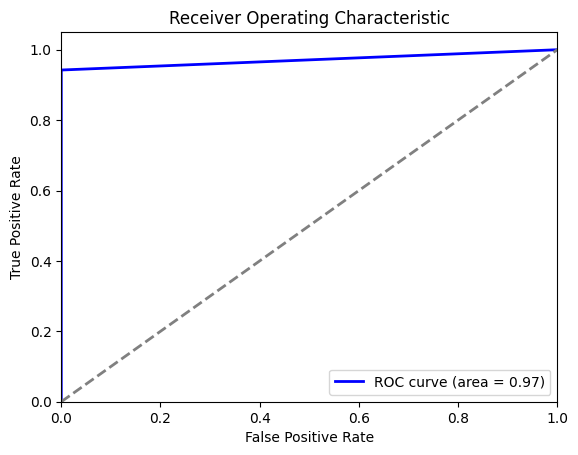

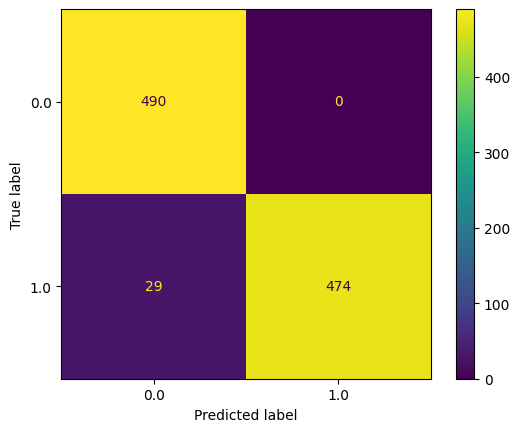

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Calculate accuracy
accuracy = accuracy_score(y_test_tesla['label'], y_pred_tesla)
print(f'Accuracy: {accuracy:.2f}')

# Calculate precision
precision = precision_score(y_test_tesla['label'], y_pred_tesla)
print(f'Precision: {precision:.2f}')

# Calculate recall
recall = recall_score(y_test_tesla['label'], y_pred_tesla)
print(f'Recall: {recall:.2f}')

# Calculate F1-score
f1 = f1_score(y_test_tesla['label'], y_pred_tesla)
print(f'F1-score: {f1:.2f}')

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test_tesla['label'], y_pred_tesla)
print(f'ROC AUC score: {roc_auc:.2f}')

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test_tesla['label'], y_pred_tesla)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Plot confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test_tesla['label'],y_pred_tesla)
plt.show()


**After the model here comes the strategy for which i combined the historical data and the predictions by the model with respect to the common dates**

In [ ]:

y_test_apple['prediction'] = y_pred_apple
apple_data['Date'] = pd.to_datetime(apple_data['Date'])
y_test_apple['Date'] = pd.to_datetime(y_test_apple['Date'])
merged_data_apple = pd.merge(apple_data, y_test_apple, on='Date', how='inner')
merged_data_apple

<ipython-input-68-7a201a34b7a7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test_apple['prediction'] = y_pred_apple
<ipython-input-68-7a201a34b7a7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test_apple['Date'] = pd.to_datetime(y_test_apple['Date'])


,Date,Open,High,Low,Close,Adj Close,Volume,label,prediction
0,2020-01-02,74.059998,75.150002,73.797501,75.087502,73.059418,135480400,1.0,1.0
1,2020-01-03,74.287498,75.144997,74.125000,74.357498,72.349129,146322800,1.0,1.0
2,2020-01-06,73.447502,74.989998,73.187500,74.949997,72.925621,118387200,1.0,1.0
3,2020-01-07,74.959999,75.224998,74.370003,74.597504,72.582649,108872000,0.0,0.0
4,2020-01-08,74.290001,76.110001,74.290001,75.797501,73.750259,132079200,1.0,1.0
...,...,...,...,...,...,...,...,...,...
996,2023-12-22,195.179993,195.410004,192.970001,193.600006,193.353287,37122800,0.0,0.0
997,2023-12-26,193.610001,193.889999,192.830002,193.050003,192.803986,28919300,0.0,0.0
998,2023-12-27,192.490005,193.500000,191.089996,193.149994,192.903839,48087700,1.0,1.0
999,2023-12-28,194.139999,194.660004,193.169998,193.580002,193.333298,34049900,0.0,0.0


In [ ]:
merged_data_apple.drop(['label'],axis=1,inplace=True)

In [ ]:
merged_data_apple

,Date,Open,High,Low,Close,Adj Close,Volume,prediction
0,2020-01-02,74.059998,75.150002,73.797501,75.087502,73.059418,135480400,1.0
1,2020-01-03,74.287498,75.144997,74.125000,74.357498,72.349129,146322800,1.0
2,2020-01-06,73.447502,74.989998,73.187500,74.949997,72.925621,118387200,1.0
3,2020-01-07,74.959999,75.224998,74.370003,74.597504,72.582649,108872000,0.0
4,2020-01-08,74.290001,76.110001,74.290001,75.797501,73.750259,132079200,1.0
...,...,...,...,...,...,...,...,...
996,2023-12-22,195.179993,195.410004,192.970001,193.600006,193.353287,37122800,0.0
997,2023-12-26,193.610001,193.889999,192.830002,193.050003,192.803986,28919300,0.0
998,2023-12-27,192.490005,193.500000,191.089996,193.149994,192.903839,48087700,1.0
999,2023-12-28,194.139999,194.660004,193.169998,193.580002,193.333298,34049900,0.0


In [ ]:
y_test_tesla['Predictions']=y_pred_tesla
tesla_data['Date'] = pd.to_datetime(tesla_data['Date'])
y_test_tesla['Date'] = pd.to_datetime(y_test_tesla['Date'])
merged_data_tesla = pd.merge(tesla_data, y_test_tesla, on='Date', how='inner')


<ipython-input-71-47fe79e6bb31>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test_tesla['Predictions']=y_pred_tesla
<ipython-input-71-47fe79e6bb31>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test_tesla['Date'] = pd.to_datetime(y_test_tesla['Date'])


In [ ]:
merged_data_tesla.drop(['label'],axis=1,inplace=True)

**Plotting the buy and sell signals and other parameters of Apple**

In [ ]:
import pandas as pd

Total Trades: 1034
Wins: 839
Losses: 195
Win Ratio: 0.81
Mean Daily Return: 0.28270%
Total Return: 1537.18%
Annualized Return: 103.69%
Sharpe Ratio: 5.92
Max Drawdown: -9.59%
165400.00953674316


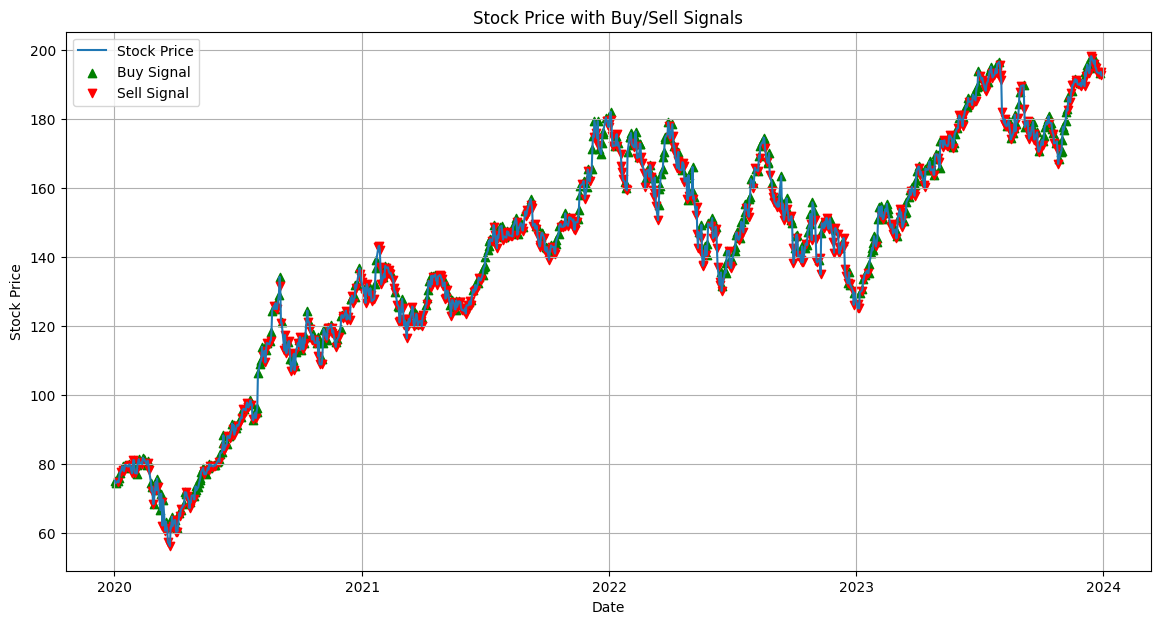

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import numpy as np

merged_data_apple['Date'] = pd.to_datetime(merged_data_apple['Date'])

stop_loss = 0.05
take_profit = 0.10
initial_capital = 10000
cash = initial_capital
position = 0
buy_price = 0
portfolio_values = []
trades = []
wins = 0
losses = 0
num_stocks_to_buy = 100

for i in range(len(merged_data_apple)):
    if merged_data_apple.iloc[i]['prediction'] == 1 and cash > merged_data_apple.iloc[i]['Open'] * num_stocks_to_buy:  # Buy
        position += num_stocks_to_buy
        cash -= merged_data_apple.iloc[i]['Open'] * num_stocks_to_buy
        buy_price = merged_data_apple.iloc[i]['Open']
    elif merged_data_apple.iloc[i]['prediction'] == 0 and position > 0:  # Sell
        sell_price = merged_data_apple.iloc[i]['Open']
        cash += position * sell_price
        trades.append((buy_price, sell_price))
        if sell_price > buy_price:
            wins += 1
        else:
            losses += 1
        position = 0
    elif position > 0:
        if merged_data_apple.iloc[i]['Low'] < buy_price * (1 - stop_loss):
            sell_price = merged_data_apple.iloc[i]['Low']
            cash += position * sell_price
            trades.append((buy_price, sell_price))
            losses += 1
            position = 0
        elif merged_data_apple.iloc[i]['High'] > buy_price * (1 + take_profit):
            sell_price = merged_data_apple.iloc[i]['High']
            cash += position * sell_price
            trades.append((buy_price, sell_price))
            wins += 1
            position = 0
    portfolio_value = cash + position * merged_data_apple.iloc[i]['Close']
    portfolio_values.append(portfolio_value)
    if portfolio_value>initial_capital:
      wins+=1
      initial_capital=portfolio_value
    elif portfolio_value<initial_capital:
      losses+=1
      initial_capital=portfolio_value
total_trades=wins+losses
win_ratio=wins/total_trades

returns = np.diff(portfolio_values) / portfolio_values[:-1]

mean_daily_return = np.mean(returns)

total_return = (portfolio_values[-1] - portfolio_values[0]) / portfolio_values[0]

annualized_return = (1 + mean_daily_return)**252 - 1

std_return = np.std(returns)
risk_free_rate = 0.01
sharpe_ratio = (mean_daily_return * 252 - risk_free_rate) / (std_return * np.sqrt(252))

portfolio_values_array = np.array(portfolio_values)
rolling_max = np.maximum.accumulate(portfolio_values_array)
drawdowns = (portfolio_values_array - rolling_max) / rolling_max
max_drawdown = drawdowns.min()

print(f"Total Trades: {total_trades}")
print(f"Wins: {wins}")
print(f"Losses: {losses}")
print(f"Win Ratio: {win_ratio:.2f}")
print(f"Mean Daily Return: {mean_daily_return * 100:.5f}%")
print(f"Total Return: {total_return * 100:.2f}%")
print(f"Annualized Return: {annualized_return * 100:.2f}%")
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")
print(f"Max Drawdown: {max_drawdown:.2%}")
print(portfolio_values[-1])

plt.figure(figsize=(14, 7))
plt.plot(merged_data_apple['Date'], merged_data_apple['Close'], label='Stock Price')
plt.scatter(merged_data_apple[merged_data_apple['prediction'] == 1]['Date'], merged_data_apple[merged_data_apple['prediction'] == 1]['Close'], marker='^', color='g', label='Buy Signal', alpha=1)
plt.scatter(merged_data_apple[merged_data_apple['prediction'] == 0]['Date'], merged_data_apple[merged_data_apple['prediction'] == 0]['Close'], marker='v', color='r', label='Sell Signal', alpha=1)

plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.title('Stock Price with Buy/Sell Signals')
plt.grid(True)
plt.show()


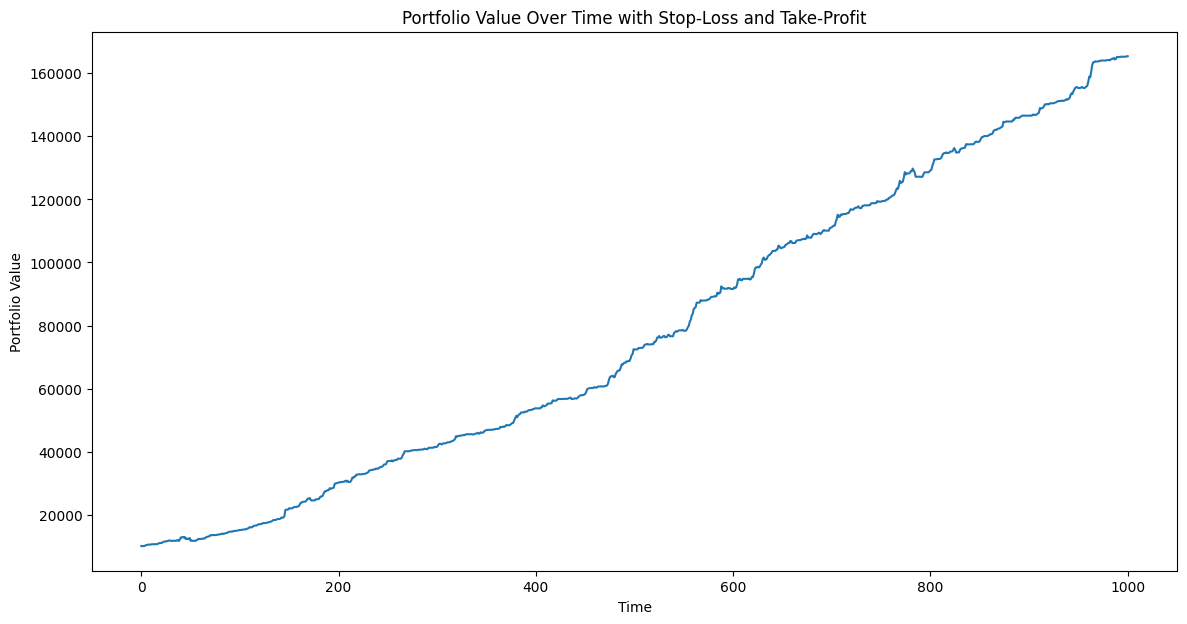

Final Portfolio Value with Stop-Loss and Take-Profit: $165400.01


In [ ]:

plt.figure(figsize=(14, 7))
plt.plot(portfolio_values)
plt.title('Portfolio Value Over Time with Stop-Loss and Take-Profit')
plt.xlabel('Time')
plt.ylabel('Portfolio Value')
plt.show()

final_portfolio_value = portfolio_values[-1]
print(f'Final Portfolio Value with Stop-Loss and Take-Profit: ${final_portfolio_value:.2f}')

**Plotting The Buy/Sell Signals and other parameters of Tesla**


Total Trades: 994
Wins: 853
Losses: 141
Win Ratio: 0.86
Mean Daily Return: 0.40782%
Total Return: 5220.79%
Annualized Return: 178.88%
Sharpe Ratio: 5.54
Max Drawdown: -7.25%
534122.004699707


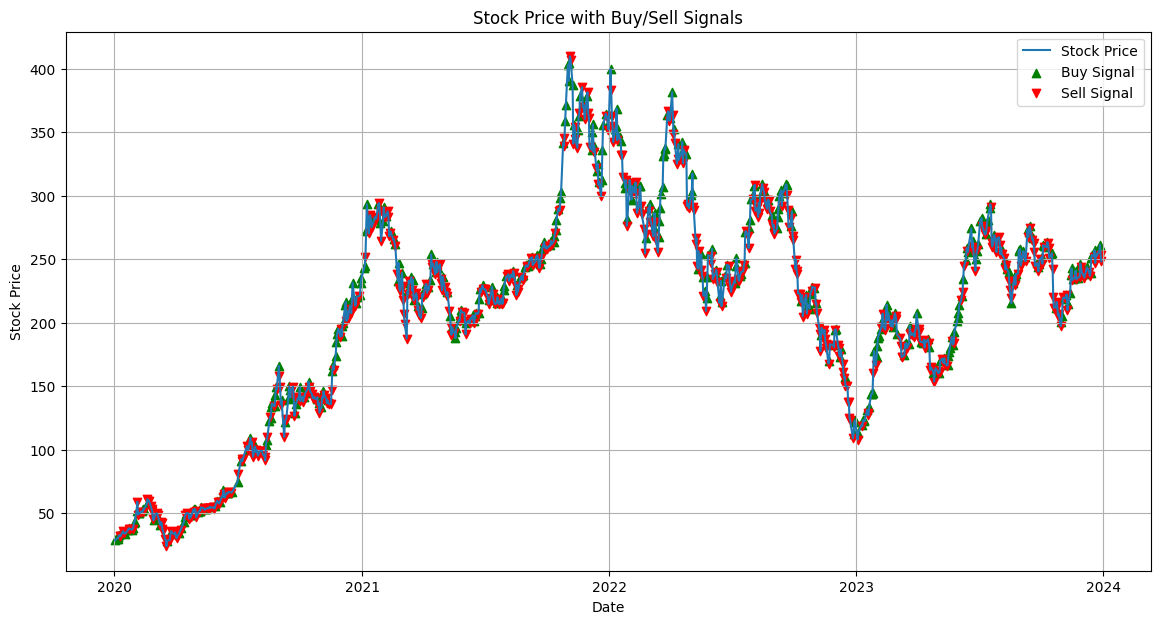

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import numpy as np
merged_data_tesla['Date'] = pd.to_datetime(merged_data_tesla['Date'])

stop_loss = 0.05
take_profit = 0.10
initial_capital = 10000
cash = initial_capital
position = 0
buy_price = 0
portfolio_values = []
trades = []
wins = 0
losses = 0
num_stocks_to_buy = 100
for i in range(len(merged_data_tesla)):
    if merged_data_tesla.iloc[i]['Predictions'] == 1 and cash > merged_data_tesla.iloc[i]['Open'] * num_stocks_to_buy:
        position += num_stocks_to_buy
        cash -= merged_data_tesla.iloc[i]['Open'] * num_stocks_to_buy
        buy_price = merged_data_tesla.iloc[i]['Open']
    elif merged_data_tesla.iloc[i]['Predictions'] == 0 and position > 0:
        sell_price = merged_data_tesla.iloc[i]['Open']
        cash += position * sell_price
        trades.append((buy_price, sell_price))
        if sell_price > buy_price:
            wins += 1
        else:
            losses += 1
        position = 0
    elif position > 0:
        if merged_data_tesla.iloc[i]['Low'] < buy_price * (1 - stop_loss):
            sell_price = merged_data_tesla.iloc[i]['Low']
            cash += position * sell_price
            trades.append((buy_price, sell_price))
            losses += 1
            position = 0
        elif merged_data_tesla.iloc[i]['High'] > buy_price * (1 + take_profit):
            sell_price = merged_data_tesla.iloc[i]['High']
            cash += position * sell_price
            trades.append((buy_price, sell_price))
            wins += 1
            position = 0
    portfolio_value = cash + position * merged_data_tesla.iloc[i]['Close']
    portfolio_values.append(portfolio_value)
    if portfolio_value>initial_capital:
      wins+=1
      initial_capital=portfolio_value
    elif portfolio_value<initial_capital:
      losses+=1
      initial_capital=portfolio_value
total_trades=wins+losses
win_ratio=wins/total_trades


returns = np.diff(portfolio_values) / portfolio_values[:-1]


mean_daily_return = np.mean(returns)

total_return = (portfolio_values[-1] - portfolio_values[0]) / portfolio_values[0]

annualized_return = (1 + mean_daily_return)**252 - 1

std_return = np.std(returns)
risk_free_rate = 0.01
sharpe_ratio = (mean_daily_return * 252 - risk_free_rate) / (std_return * np.sqrt(252))

portfolio_values_array = np.array(portfolio_values)
rolling_max = np.maximum.accumulate(portfolio_values_array)
drawdowns = (portfolio_values_array - rolling_max) / rolling_max
max_drawdown = drawdowns.min()

print(f"Total Trades: {total_trades}")
print(f"Wins: {wins}")
print(f"Losses: {losses}")
print(f"Win Ratio: {win_ratio:.2f}")
print(f"Mean Daily Return: {mean_daily_return * 100:.5f}%")
print(f"Total Return: {total_return * 100:.2f}%")
print(f"Annualized Return: {annualized_return * 100:.2f}%")
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")
print(f"Max Drawdown: {max_drawdown:.2%}")
print(portfolio_values[-1])

plt.figure(figsize=(14, 7))
plt.plot(merged_data_tesla['Date'], merged_data_tesla['Close'], label='Stock Price')
plt.scatter(merged_data_tesla[merged_data_tesla['Predictions'] == 1]['Date'], merged_data_tesla[merged_data_tesla['Predictions'] == 1]['Close'], marker='^', color='g', label='Buy Signal', alpha=1)
plt.scatter(merged_data_tesla[merged_data_tesla['Predictions'] == 0]['Date'], merged_data_tesla[merged_data_tesla['Predictions'] == 0]['Close'], marker='v', color='r', label='Sell Signal', alpha=1)

plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.title('Stock Price with Buy/Sell Signals')
plt.grid(True)
plt.show()


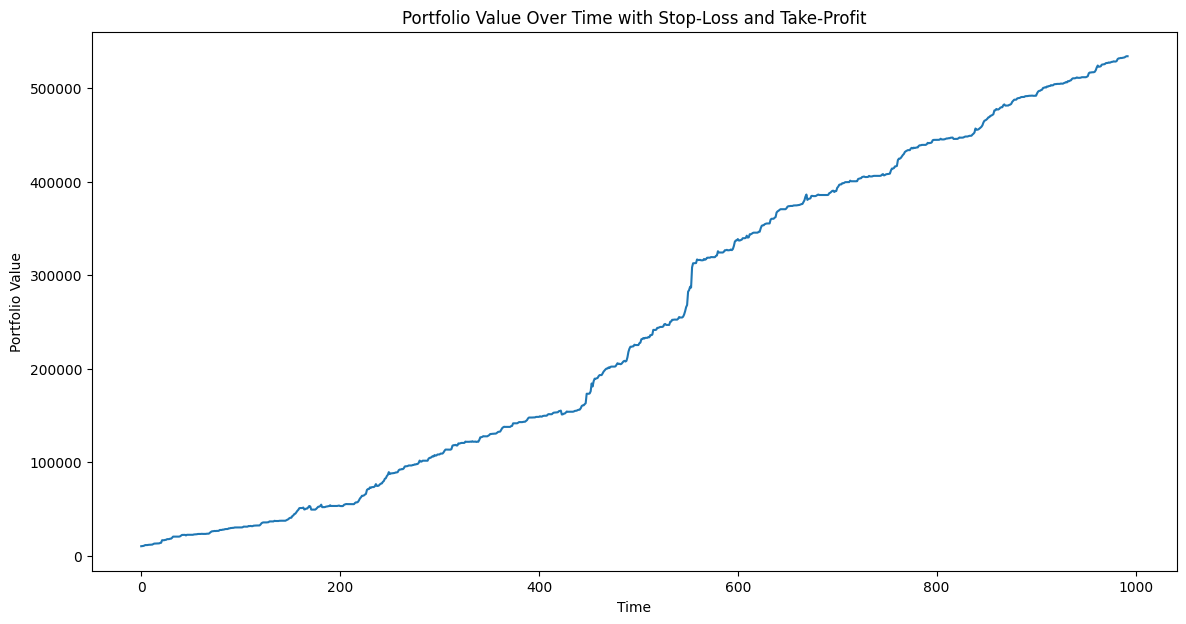

Final Portfolio Value with Stop-Loss and Take-Profit: $534122.00


In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(portfolio_values)
plt.title('Portfolio Value Over Time with Stop-Loss and Take-Profit')
plt.xlabel('Time')
plt.ylabel('Portfolio Value')
plt.show()
final_portfolio_value = portfolio_values[-1]
print(f'Final Portfolio Value with Stop-Loss and Take-Profit: ${final_portfolio_value:.2f}')